<a href="https://colab.research.google.com/github/yhy0519/Machine_learning_of_Python/blob/main/python_m06_1_03_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **■ kmeans 알고리즘**

주어진 데이터를 k 개의 군집으로 묶는 알고리즘으로 k개 만큼 군집수를 초기값으로 지정하고,
각 개체를 가까운 초기값에 할당하여 군집을 형성하고 각 군집의 평균을 재계산하여
초기값을 갱신하는 과정을 반복하여 k 개의 최종군집을 형성한다.

군집 절차 순서 :  

    1. k개 객체 선택 
	2. 할당(Assingment)
	3. 중심갱신
	4. 반복

k-means 의 하이퍼 파라미터 ?  k 값

비지도 학습 ? 

    비지도 학습은 데이터에 대한 정답인 레이블(label) 이 없는 상태에서 데이터가 어떻게 구성되었는지 아내는 기계학습 기법입니다.

	 1. k-means
	 2. SOM (자기 조직화 지도) : 인공신경망을 활용한 비지도학습
	      ↓
      self organization map

예제:

In [1]:
### 기본 라이브러리 불러오기
import pandas as pd
import matplotlib.pyplot as plt

'''
[Step 1] 데이터 준비
'''

from pandas import Series, DataFrame
import numpy as np

df = DataFrame({ "x": [3,1,7,5,6,4,9,7,6,2],   "y": [4,5,9,4,8,5,8,8,7,1] }, index=['A','B','C','D','E','F','G','H','I','J'])
df

,x,y
A,3,4
B,1,5
C,7,9
D,5,4
E,6,8
F,4,5
G,9,8
H,7,8
I,6,7
J,2,1


In [2]:
'''
[Step 2] 데이터 탐색
'''

# 데이터 살펴보기
print(df.head())   
print('\n')

   x  y
A  3  4
B  1  5
C  7  9
D  5  4
E  6  8




In [3]:
# 데이터 자료형 확인
print(df.info())  
print('\n')

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, A to J
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   x       10 non-null     int64
 1   y       10 non-null     int64
dtypes: int64(2)
memory usage: 240.0+ bytes
None




In [4]:
# 데이터 통계 요약정보 확인
print(df.describe())
print('\n')

               x          y
count  10.000000  10.000000
mean    5.000000   5.900000
std     2.494438   2.514403
min     1.000000   1.000000
25%     3.250000   4.250000
50%     5.500000   6.000000
75%     6.750000   8.000000
max     9.000000   9.000000




In [5]:
## 비지도 학습이라 y 값을 생성하는 부분은 없습니다.
'''
[Step 3] 데이터 전처리
'''

# 분석에 사용할 속성을 선택
X = df.iloc[:, :]
print(X[:5])
print('\n')

   x  y
A  3  4
B  1  5
C  7  9
D  5  4
E  6  8




In [6]:
## k-means 가 이상치에 민감하므로 이상치의 영향력을 감소시키기 위해 표준화
# 설명 변수 데이터를 표준화
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)

print(X[:5])
print('\n')

[[-0.84515425 -0.79652144]
 [-1.69030851 -0.37729963]
 [ 0.84515425  1.29958761]
 [ 0.         -0.79652144]
 [ 0.42257713  0.8803658 ]]




In [7]:
'''
[Step 4] k-means 군집 모형 - sklearn 사용
'''

# sklearn 라이브러리에서 cluster 군집 모형 가져오기
from sklearn import cluster

# 모형 객체 생성 
kmeans = cluster.KMeans(init='k-means++', n_clusters=2, n_init=10)   # n_clusters=2 -> 군집의 개수 설정

## 설명: n_init 은 seed 값  
## n_init은 초기 중앙점이 무작위로 선택되기에 가장 나은 결과를 얻기 위해 몇 번 초기값을 변경하여 
## 알고리즘을 실시할 지를 정하는 것이다. 간단하게 표현하면 초기중심점 선택의 반복 횟수 알고리즘인 것이다.
## n_init은 초기 중앙점이 무작위로 선택되기 때문에 최상의 결과를 얻기 위해 몇 번 초기값을 변경하여 알고리즘을 실시할지를 정하는 횟수 
## k-means++ : http://hleecaster.com/k-means-clustering-concept/

In [8]:
# 모형 학습
kmeans.fit(X)   

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [9]:
# 예측 (군집) 
cluster_label = kmeans.labels_
print(cluster_label)
print('\n')

[1 1 0 1 0 1 0 0 0 1]




In [10]:
# 예측 결과를 데이터프레임에 추가
df['Cluster'] = cluster_label
print(df)   
print('\n')

   x  y  Cluster
A  3  4        1
B  1  5        1
C  7  9        0
D  5  4        1
E  6  8        0
F  4  5        1
G  9  8        0
H  7  8        0
I  6  7        0
J  2  1        1




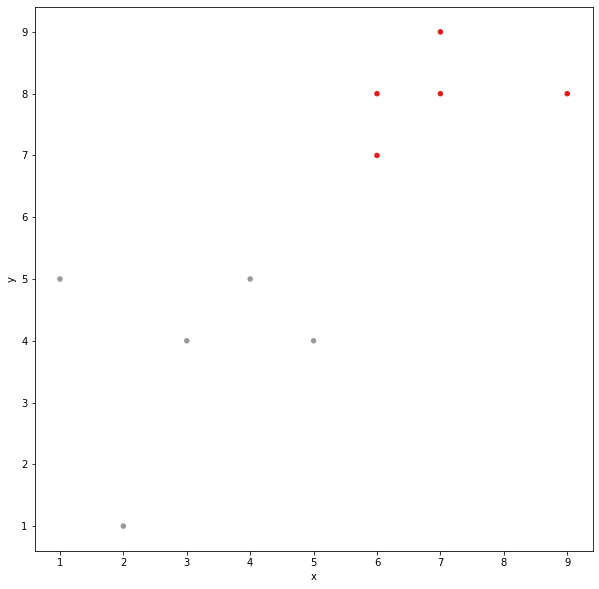

In [11]:
# 그래프로 표현 - 시각화
df.plot(kind='scatter', x='x', y='y', c='Cluster', cmap='Set1',    # cmap : https://codetorial.net/matplotlib/set_colormap.html
        colorbar=False, figsize=(10, 10))

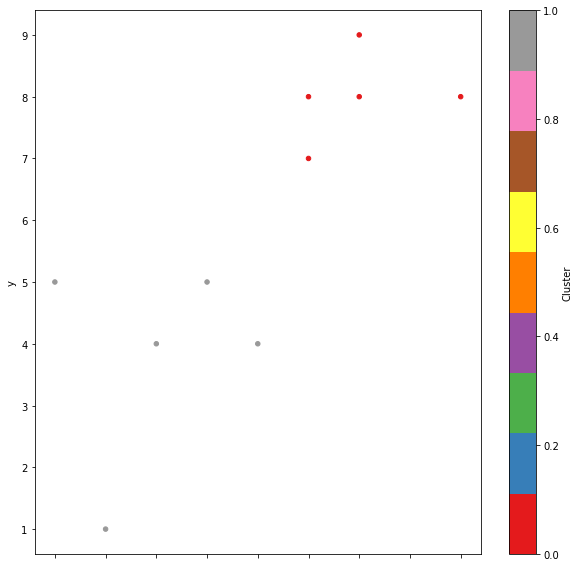

In [12]:
df.plot(kind='scatter', x='x', y='y', c='Cluster', cmap='Set1', 
        colorbar=True, figsize=(10, 10))
plt.show()
plt.close()

문제49. 아래의 예제로 데이터 프레임을 만들고 토마토가 어느 군집에 속하는지 출력하시오 ! (군집 3개)

In [13]:
### 기본 라이브러리 불러오기
import pandas as pd
import matplotlib.pyplot as plt

'''
[Step 1] 데이터 준비
'''

from pandas import Series, DataFrame
import numpy as np

data = DataFrame({ "x": [10,1,10,7,3,1,6],   "y": [9,4,1,10,10,1,7] }, index=['APPLE','BACON','BANANA','CARROT','CELERY','CHEESE','TOMATO'])
data

,x,y
APPLE,10,9
BACON,1,4
BANANA,10,1
CARROT,7,10
CELERY,3,10
CHEESE,1,1
TOMATO,6,7


In [14]:
'''
[Step 2] 데이터 탐색
'''

# 데이터 살펴보기
print(data)   
print('\n')

         x   y
APPLE   10   9
BACON    1   4
BANANA  10   1
CARROT   7  10
CELERY   3  10
CHEESE   1   1
TOMATO   6   7




In [15]:
# 데이터 자료형 확인
print(data.info())  
print('\n')

<class 'pandas.core.frame.DataFrame'>
Index: 7 entries, APPLE to TOMATO
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   x       7 non-null      int64
 1   y       7 non-null      int64
dtypes: int64(2)
memory usage: 168.0+ bytes
None




In [16]:
# 데이터 통계 요약정보 확인
print(df.describe())
print('\n')

               x          y    Cluster
count  10.000000  10.000000  10.000000
mean    5.000000   5.900000   0.500000
std     2.494438   2.514403   0.527046
min     1.000000   1.000000   0.000000
25%     3.250000   4.250000   0.000000
50%     5.500000   6.000000   0.500000
75%     6.750000   8.000000   1.000000
max     9.000000   9.000000   1.000000




In [17]:
'''
[Step 3] 데이터 전처리
'''

# 분석에 사용할 속성을 선택
X = data.iloc[:, :]
print(X)
print('\n')

         x   y
APPLE   10   9
BACON    1   4
BANANA  10   1
CARROT   7  10
CELERY   3  10
CHEESE   1   1
TOMATO   6   7




In [18]:
## k-means 가 이상치에 민감하므로 이상치의 영향력을 감소시키기 위해 표준화
# 설명 변수 데이터를 표준화
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)

print(X[:])
print('\n')

[[ 1.27693902  0.81009259]
 [-1.23703467 -0.54006172]
 [ 1.27693902 -1.35015431]
 [ 0.43894779  1.08012345]
 [-0.67837385  1.08012345]
 [-1.23703467 -1.35015431]
 [ 0.15961738  0.27003086]]




In [19]:
'''
[Step 4] k-means 군집 모형 - sklearn 사용
'''

# sklearn 라이브러리에서 cluster 군집 모형 가져오기
from sklearn import cluster

# 모형 객체 생성 
kmeans = cluster.KMeans(init='k-means++', n_clusters=3, n_init=10)

In [20]:
# 모형 학습
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [21]:
# 예측 (군집) 
cluster_label = kmeans.labels_   
print(cluster_label)
print('\n')

[1 0 2 1 1 0 1]




In [22]:
# 예측 결과를 데이터프레임에 추가
data['Cluster'] = cluster_label
print(data)   
print('\n')

         x   y  Cluster
APPLE   10   9        1
BACON    1   4        0
BANANA  10   1        2
CARROT   7  10        1
CELERY   3  10        1
CHEESE   1   1        0
TOMATO   6   7        1




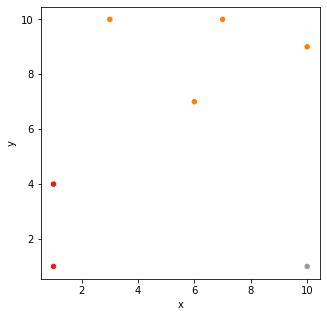

In [23]:
# 그래프로 표현 - 시각화
data.plot(kind='scatter', x='x', y='y', c='Cluster', cmap='Set1', 
        colorbar=False, figsize=(5, 5))

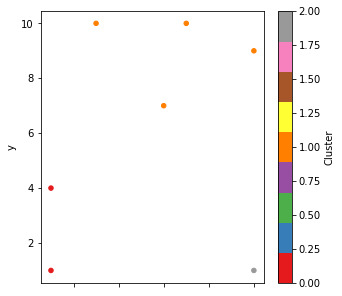

In [24]:
data.plot(kind='scatter', x='x', y='y', c='Cluster', cmap='Set1', 
        colorbar=True, figsize=(5, 5))
plt.show()
plt.close()

결과해석 : 토마토는 단맛 : 6, 아삭함 : 7 로 사과, 당근, 샐러리와 같은 군집(빨간색)에 속한 아이템 입니다.

문제50. UCI 데이터 중 식품에 관련한 데이터를 k-means 알고리즘으로 분류하시오 !

k 값을 5로 주어서 크게 5개의 군집으로 식품을 분류한다.

In [25]:
# -*- coding: utf-8 -*
### 기본 라이브러리 불러오기
import pandas as pd
import matplotlib.pyplot as plt

'''
[Step 1] 데이터 준비
'''

# Wholesale customers 데이터셋 가져오기 (출처: UCI ML Repository)
uci_path = 'https://archive.ics.uci.edu/ml/machine-learning-databases/\
00292/Wholesale%20customers%20data.csv'
df = pd.read_csv(uci_path, header=0)
df

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


※ 데이터셋 설명 : UCI 머신러닝 저장소에서 제공하는 도매업 고객 데이터셋입니다.  
각 고객의 연간 구매금액을 상품 카테고리별로 구분하여 정리한 데이터 입니다.  
모두 8개의 컬럼에 440개의 행으로 되어있고 첫번째 2개의 컬럼은 상품 구매금액이 아니라 고객의 일반정보입니다.  
Channel 컬럼은 호텔/레스토랑 또는 소매점등의 판매 채널이고 region 은 고객의 소재지를 나타냅니다.

    Channel : 판매채널  
    Region : 고객의 소재지  
    Milk : 유제품  
    Grocery : 식자재  
    Frozen : 냉동식품  
    Detergents_Pater : 세제  
    Delicassen : 햄과 같은 육가공 식품

In [26]:
'''
[Step 2] 데이터 탐색
'''

# 데이터 살펴보기
print(df.head())   
print('\n')

   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185




In [27]:
# 데이터 자료형 확인
print(df.info())    # 정수형 데이터
print('\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB
None




In [28]:
# 데이터 통계 요약정보 확인
print(df.describe())
print('\n')

          Channel      Region  ...  Detergents_Paper    Delicassen
count  440.000000  440.000000  ...        440.000000    440.000000
mean     1.322727    2.543182  ...       2881.493182   1524.870455
std      0.468052    0.774272  ...       4767.854448   2820.105937
min      1.000000    1.000000  ...          3.000000      3.000000
25%      1.000000    2.000000  ...        256.750000    408.250000
50%      1.000000    3.000000  ...        816.500000    965.500000
75%      2.000000    3.000000  ...       3922.000000   1820.250000
max      2.000000    3.000000  ...      40827.000000  47943.000000

[8 rows x 8 columns]




In [29]:
'''
[Step 3] 데이터 전처리
'''

# 분석에 사용할 속성을 선택
X = df.iloc[:, :]
print(X[:5])
print('\n')

   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185




In [30]:
# 설명 변수 데이터를 표준화
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)

print(X[:5])
print('\n')

[[ 1.44865163  0.59066829  0.05293319  0.52356777 -0.04111489 -0.58936716
  -0.04356873 -0.06633906]
 [ 1.44865163  0.59066829 -0.39130197  0.54445767  0.17031835 -0.27013618
   0.08640684  0.08915105]
 [ 1.44865163  0.59066829 -0.44702926  0.40853771 -0.0281571  -0.13753572
   0.13323164  2.24329255]
 [-0.69029709  0.59066829  0.10011141 -0.62401993 -0.3929769   0.6871443
  -0.49858822  0.09341105]
 [ 1.44865163  0.59066829  0.84023948 -0.05239645 -0.07935618  0.17385884
  -0.23191782  1.29934689]]




In [31]:
'''
[Step 4] k-means 군집 모형 - sklearn 사용
'''

# sklearn 라이브러리에서 cluster 군집 모형 가져오기
from sklearn import cluster

# 모형 객체 생성 
kmeans = cluster.KMeans(init='k-means++', n_clusters=5, n_init=10)   # 5개 군집

In [32]:
# 모형 학습
kmeans.fit(X)   

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [33]:
# 예측 (군집) 
cluster_label = kmeans.labels_   
print(cluster_label)
print('\n')

[2 2 2 1 2 2 2 2 1 2 2 2 2 2 2 1 2 1 2 1 2 1 1 4 2 2 1 1 2 1 1 1 1 1 1 2 1
 2 2 1 1 1 2 2 2 2 2 0 2 2 1 1 2 2 1 1 0 2 1 1 2 0 2 2 1 0 1 2 1 1 1 4 1 2
 2 1 1 2 1 1 1 2 2 1 2 0 0 4 1 1 1 1 0 1 2 1 2 1 1 1 2 2 2 1 1 1 2 2 2 2 1
 2 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1
 1 1 1 1 1 1 1 2 2 1 2 2 2 1 1 2 2 2 2 1 1 1 2 2 1 2 1 2 1 1 1 1 1 4 1 4 1
 1 1 1 2 2 1 1 1 2 1 1 3 2 3 3 2 2 3 3 3 2 3 3 3 2 3 0 3 3 2 3 2 3 2 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 3 3 3 3 3 0 3 3 3 3 3 3 3
 3 3 3 3 3 2 3 2 3 2 3 3 3 3 1 1 1 1 1 1 2 1 2 1 1 1 1 1 1 1 1 1 1 1 2 3 2
 3 2 2 3 2 2 2 2 2 2 2 3 3 2 3 3 2 3 3 2 3 3 3 2 3 3 3 3 3 4 3 3 3 3 3 2 3
 0 3 2 3 3 3 3 2 2 1 2 1 1 2 2 1 2 1 2 1 2 1 1 1 2 1 1 1 1 1 1 1 2 1 1 1 1
 2 1 1 2 1 1 2 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1
 2 2 1 1 1 1 1 1 2 2 1 2 1 1 2 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1]




In [34]:
# 예측 결과를 데이터프레임에 추가
df['Cluster'] = cluster_label
print(df.head())   
print('\n')

   Channel  Region  Fresh  Milk  ...  Frozen  Detergents_Paper  Delicassen  Cluster
0        2       3  12669  9656  ...     214              2674        1338        2
1        2       3   7057  9810  ...    1762              3293        1776        2
2        2       3   6353  8808  ...    2405              3516        7844        2
3        1       3  13265  1196  ...    6404               507        1788        1
4        2       3  22615  5410  ...    3915              1777        5185        2

[5 rows x 9 columns]




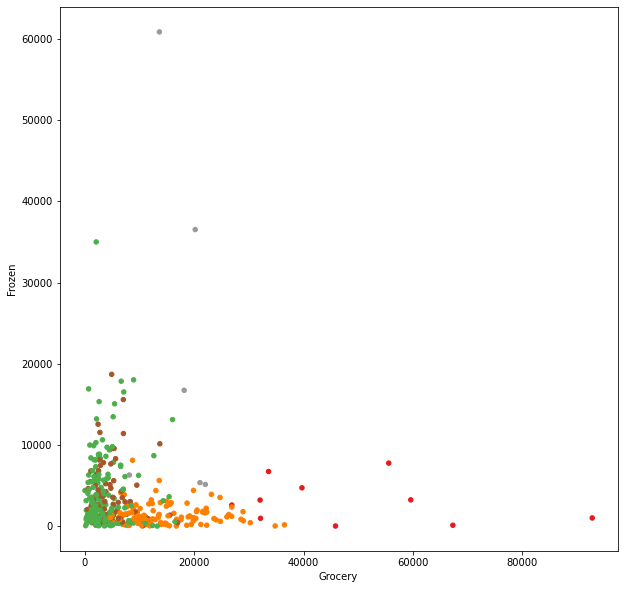

In [35]:
# 그래프로 표현 - 시각화 (변수 2개씩만 선택하여 시각화)
df.plot(kind='scatter', x='Grocery', y='Frozen', c='Cluster', cmap='Set1', 
        colorbar=False, figsize=(10, 10))

In [36]:
df[df['Frozen']>60000]

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster
325,1,2,32717,16784,13626,60869,1272,5609,4


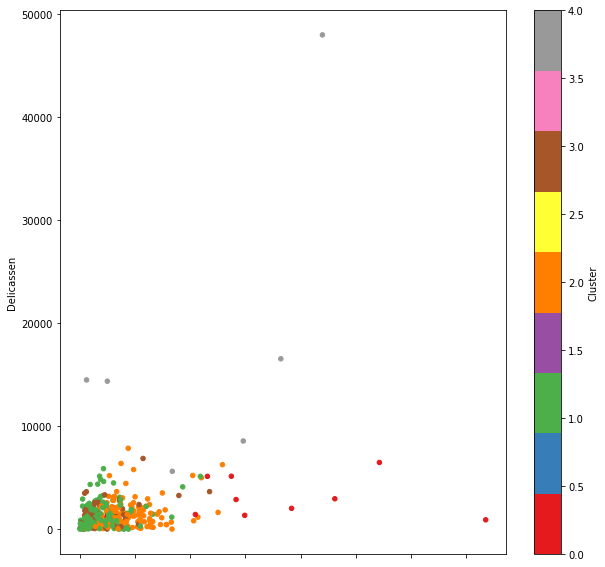

In [37]:
df.plot(kind='scatter', x='Milk', y='Delicassen', c='Cluster', cmap='Set1', 
        colorbar=True, figsize=(10, 10))
plt.show()
plt.close()

In [38]:
# 큰 값으로 구성된 클러스터(0, 2)를 제외 - 값이 몰려 있는 구간을 자세하게 분석
mask = (df['Cluster'] == 0) | (df['Cluster'] == 2)
ndf = df[~mask]

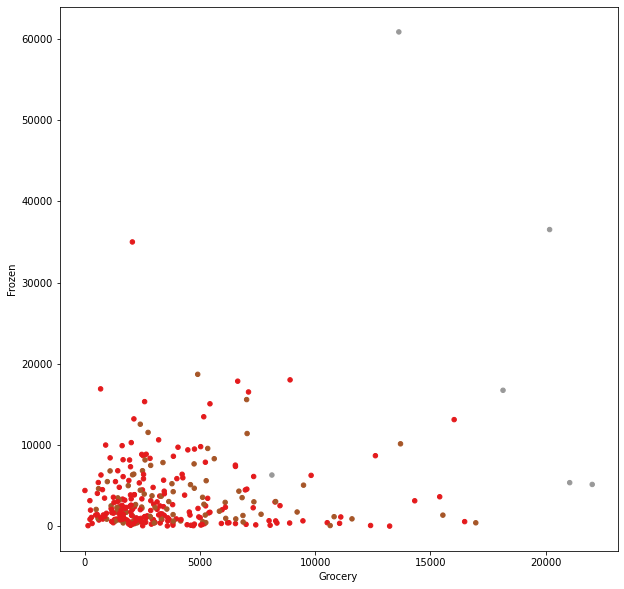

In [39]:
ndf.plot(kind='scatter', x='Grocery', y='Frozen', c='Cluster', cmap='Set1', 
        colorbar=False, figsize=(10, 10))

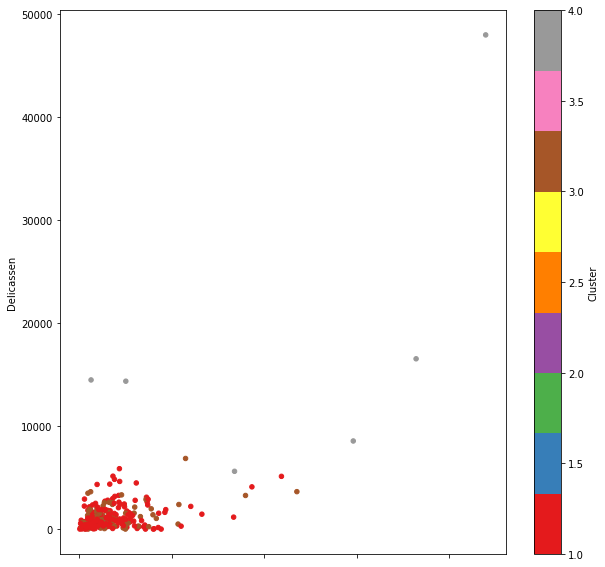

In [40]:
ndf.plot(kind='scatter', x='Milk', y='Delicassen', c='Cluster', cmap='Set1', 
        colorbar=True, figsize=(10, 10))
plt.show()
plt.close()

문제51. 유방암 데이터를 k-means 로 분류하는데 파이썬을 이용해서 분류하시오 !


In [41]:
### 기본 라이브러리 불러오기
import pandas as pd
import matplotlib.pyplot as plt

'''
[Step 1] 데이터 준비
'''

from pandas import Series, DataFrame
import numpy as np

df = pd.read_csv('/content/drive/MyDrive/data/wisc_bc_data.csv')
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,points_se,symmetry_se,dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,87139402,B,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,0.1959,0.05955,0.2360,0.6656,1.670,17.43,0.008045,0.011800,0.01683,0.012410,0.01924,0.002248,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,8910251,B,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,0.1922,0.06491,0.4505,1.1970,3.430,27.10,0.007470,0.035810,0.03354,0.013650,0.03504,0.003318,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,905520,B,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,0.1714,0.06340,0.1967,1.3870,1.342,13.54,0.005158,0.009355,0.01056,0.007483,0.01718,0.002198,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,868871,B,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,0.1771,0.06072,0.3384,1.3430,1.851,26.33,0.011270,0.034980,0.02187,0.019650,0.01580,0.003442,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,9012568,B,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,0.1721,0.05544,0.1783,0.4125,1.338,17.72,0.005012,0.014850,0.01551,0.009155,0.01647,0.001767,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,911320502,B,13.17,18.22,84.28,537.3,0.07466,0.05994,0.04859,0.02870,0.1454,0.05549,0.2023,0.6850,1.236,16.89,0.005969,0.014930,0.01564,0.008463,0.01093,0.001672,14.90,23.89,95.10,687.6,0.1282,0.1965,0.18760,0.10450,0.2235,0.06925
565,898677,B,10.26,14.71,66.20,321.6,0.09882,0.09159,0.03581,0.02037,0.1633,0.07005,0.3380,2.5090,2.394,19.33,0.017360,0.046710,0.02611,0.012960,0.03675,0.006758,10.88,19.48,70.89,357.1,0.1360,0.1636,0.07162,0.04074,0.2434,0.08488
566,873885,M,15.28,22.41,98.92,710.6,0.09057,0.10520,0.05375,0.03263,0.1727,0.06317,0.2054,0.4956,1.344,19.53,0.003290,0.013950,0.01774,0.006009,0.01172,0.002575,17.80,28.03,113.80,973.1,0.1301,0.3299,0.36300,0.12260,0.3175,0.09772
567,911201,B,14.53,13.98,93.86,644.2,0.10990,0.09242,0.06895,0.06495,0.1650,0.06121,0.3060,0.7213,2.143,25.70,0.006133,0.012510,0.01615,0.011360,0.02207,0.003563,15.80,16.93,103.10,749.9,0.1347,0.1478,0.13730,0.10690,0.2606,0.07810


In [42]:
'''
[Step 2] 데이터 탐색
'''

# 데이터 살펴보기
print(df.head())   
print('\n')

# 데이터 자료형 확인
print(df.info())  
print('\n')

# 데이터 통계 요약정보 확인
print(df.describe())
print('\n')

         id diagnosis  ...  symmetry_worst  dimension_worst
0  87139402         B  ...          0.2827          0.06771
1   8910251         B  ...          0.2940          0.07587
2    905520         B  ...          0.2998          0.07881
3    868871         B  ...          0.2102          0.06784
4   9012568         B  ...          0.2487          0.06766

[5 rows x 32 columns]


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 569 non-null    int64  
 1   diagnosis          569 non-null    object 
 2   radius_mean        569 non-null    float64
 3   texture_mean       569 non-null    float64
 4   perimeter_mean     569 non-null    float64
 5   area_mean          569 non-null    float64
 6   smoothness_mean    569 non-null    float64
 7   compactness_mean   569 non-null    float64
 8   concavity_mean     569 no

In [43]:
'''
[Step 3] 데이터 전처리
'''

# 분석에 사용할 속성을 선택 (id, diagnosis 제외)
X = df.iloc[:, 2:]
print(X[:5])
print('\n')

# 설명 변수 데이터를 표준화
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)

print(X[:5])
print('\n')

   radius_mean  texture_mean  ...  symmetry_worst  dimension_worst
0        12.32         12.39  ...          0.2827          0.06771
1        10.60         18.95  ...          0.2940          0.07587
2        11.04         16.83  ...          0.2998          0.07881
3        11.28         13.39  ...          0.2102          0.06784
4        15.19         13.21  ...          0.2487          0.06766

[5 rows x 30 columns]


[[-0.51329651 -1.60559452 -0.54037561 -0.54262379  0.45828543 -0.65441324
  -0.61430615 -0.30744224  0.53808104 -0.46038249 -0.61057748 -1.00016329
  -0.59208593 -0.5039949   0.33468727 -0.76446488 -0.49946799  0.0995745
  -0.15768039 -0.58511846 -0.57345083 -1.63449948 -0.60439078 -0.5827184
   0.26877565 -0.81212805 -0.70997823 -0.31513306 -0.11932056 -0.89972108]
 [-1.00180093 -0.07903849 -0.93456583 -0.87737467  0.03698602  0.19631867
  -0.31298684 -0.58034257  0.40299614  0.29945329  0.16359807 -0.03602094
   0.27916795 -0.29123837  0.14301283  0.57744296  0.054

In [44]:
'''
[Step 4] k-means 군집 모형 - sklearn 사용
'''

# sklearn 라이브러리에서 cluster 군집 모형 가져오기
from sklearn import cluster

# 모형 객체 생성 
kmeans = cluster.KMeans(init='k-means++', n_clusters=2, n_init=10)

In [45]:
# 모형 학습
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [46]:
# 예측 (군집)  (0, 1 은 반대로 출력될 수 있음. 자리마다 다름)
cluster_label = kmeans.labels_   
print(cluster_label)
print('\n')

[0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 1
 0 1 1 1 1 1 0 0 1 0 1 0 0 1 0 0 0 1 1 0 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 1 1 0 1 1 1 1 0 0 1 0 1 0 0 1 0 1 0 1 0 0 1 0 1 0 0 1 0 1 1 1 1 1 0 1 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 1 0 1 0 0 0 1 0 1 0 0 1 0 0 0
 0 1 1 1 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 1 1 0 0
 1 0 0 0 0 1 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0
 0 0 0 1 0 1 1 0 0 0 1 0 1 0 0 1 1 0 1 0 0 1 0 0 0 1 0 1 1 1 0 0 0 1 0 1 1
 1 1 0 1 1 0 0 1 1 1 1 0 0 0 1 1 0 0 0 0 1 1 0 0 1 1 1 0 0 1 0 1 0 1 0 0 0
 0 1 0 0 1 1 0 0 1 1 1 1 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 1 1 1 1 0
 0 1 0 0 0 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 1 0
 1 0 0 0 0 1 0 1 1 0 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0
 0 1 0 0 1 0 1 0 1 1 1 1 

In [47]:
# 예측 결과를 데이터프레임에 추가
df['Cluster'] = cluster_label
print(df.head())   
print('\n')

         id diagnosis  radius_mean  ...  symmetry_worst  dimension_worst  Cluster
0  87139402         B        12.32  ...          0.2827          0.06771        0
1   8910251         B        10.60  ...          0.2940          0.07587        0
2    905520         B        11.04  ...          0.2998          0.07881        0
3    868871         B        11.28  ...          0.2102          0.06784        0
4   9012568         B        15.19  ...          0.2487          0.06766        0

[5 rows x 33 columns]




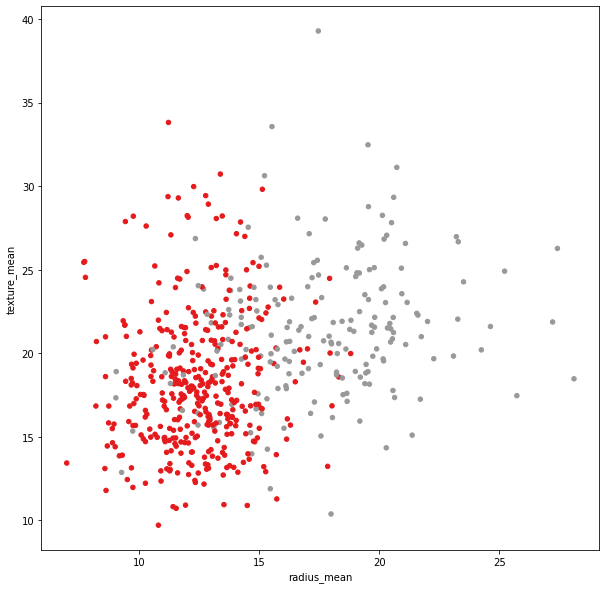

In [48]:
# 그래프로 표현 - 시각화
df.plot(kind='scatter', x='radius_mean', y='texture_mean', c='Cluster', cmap='Set1', 
        colorbar=False, figsize=(10, 10))

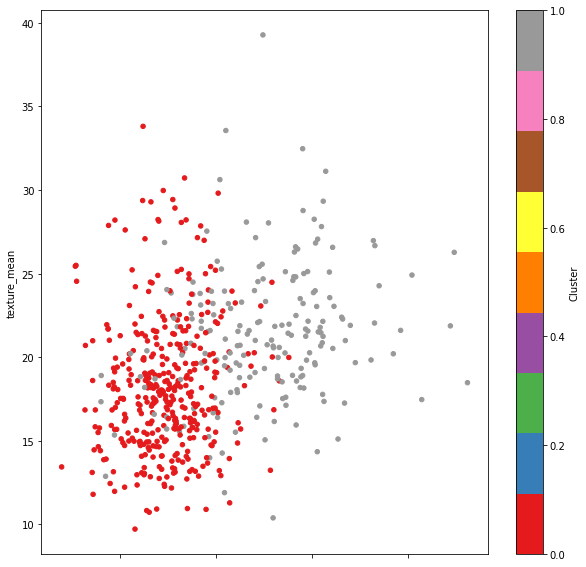

In [49]:
df.plot(kind='scatter', x='radius_mean', y='texture_mean', c='Cluster', cmap='Set1', 
        colorbar=True, figsize=(10, 10))
plt.show()
plt.close()

In [50]:
## 양성 종양이면 1 이고 약성 종양이면 0을 출력하는 func 함수로 result 변수 생성
## 얼마나 잘 맞췄는지 정확도를 보기 위해서
def func(n):
    if n=='B':
        return 1
    else:
        return 0

df['result'] = df['diagnosis'].apply(func)
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,points_se,symmetry_se,dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst,Cluster,result
0,87139402,B,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,0.1959,0.05955,0.2360,0.6656,1.670,17.43,0.008045,0.011800,0.01683,0.012410,0.01924,0.002248,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771,0,1
1,8910251,B,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,0.1922,0.06491,0.4505,1.1970,3.430,27.10,0.007470,0.035810,0.03354,0.013650,0.03504,0.003318,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587,0,1
2,905520,B,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,0.1714,0.06340,0.1967,1.3870,1.342,13.54,0.005158,0.009355,0.01056,0.007483,0.01718,0.002198,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881,0,1
3,868871,B,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,0.1771,0.06072,0.3384,1.3430,1.851,26.33,0.011270,0.034980,0.02187,0.019650,0.01580,0.003442,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784,0,1
4,9012568,B,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,0.1721,0.05544,0.1783,0.4125,1.338,17.72,0.005012,0.014850,0.01551,0.009155,0.01647,0.001767,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,911320502,B,13.17,18.22,84.28,537.3,0.07466,0.05994,0.04859,0.02870,0.1454,0.05549,0.2023,0.6850,1.236,16.89,0.005969,0.014930,0.01564,0.008463,0.01093,0.001672,14.90,23.89,95.10,687.6,0.1282,0.1965,0.18760,0.10450,0.2235,0.06925,0,1
565,898677,B,10.26,14.71,66.20,321.6,0.09882,0.09159,0.03581,0.02037,0.1633,0.07005,0.3380,2.5090,2.394,19.33,0.017360,0.046710,0.02611,0.012960,0.03675,0.006758,10.88,19.48,70.89,357.1,0.1360,0.1636,0.07162,0.04074,0.2434,0.08488,0,1
566,873885,M,15.28,22.41,98.92,710.6,0.09057,0.10520,0.05375,0.03263,0.1727,0.06317,0.2054,0.4956,1.344,19.53,0.003290,0.013950,0.01774,0.006009,0.01172,0.002575,17.80,28.03,113.80,973.1,0.1301,0.3299,0.36300,0.12260,0.3175,0.09772,0,0
567,911201,B,14.53,13.98,93.86,644.2,0.10990,0.09242,0.06895,0.06495,0.1650,0.06121,0.3060,0.7213,2.143,25.70,0.006133,0.012510,0.01615,0.011360,0.02207,0.003563,15.80,16.93,103.10,749.9,0.1347,0.1478,0.13730,0.10690,0.2606,0.07810,0,1


In [51]:
sum(df.result==df.Cluster)/len(df)  # 정확도

0.08963093145869948

문제 52. 아래의 사이트를 참고해서 iris 데이터를 사이킷런의 som 패키지로 군집화하는 실습을 수행하시오  

https://pypi.org/project/sklearn-som/

In [52]:
pip  install  sklearn-som

In [53]:
from sklearn_som.som import SOM
from sklearn import datasets

iris = datasets.load_iris()
iris_data = iris.data[:, :2]

In [54]:
iris_label = iris.target
iris_label

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [55]:
iris_som = SOM(m=3, n=1, dim=2)  # SOM 모델 생성
# 설명 : dim 이 input 데이터의 shape (iris.data[:, :2])
# m 이 뉴런의 개수, n 이 층수

In [56]:
iris_som.fit(iris_data)

In [58]:
predictions = iris_som.predict(iris_data)
predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 2, 1, 2, 0, 2, 0, 1, 1, 1, 1, 1, 2,
       1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 0, 1, 2, 2,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 2, 0, 1, 2, 1, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1])

In [59]:
sum(iris_label==predictions)/len(iris_data) 

0.7866666666666666